<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری اول تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>

</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [50]:
# TO-DO
import pandas as pd
import math
import numpy as np 

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [51]:
# load data

data_set = pd.read_excel(r"./worldcities.xlsx")

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
حذف و تغییر نام ستون ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های
<code>id</code>،
<code>‌capital</code>،
<code>ville_ascii</code> 
و 
<code>admin_nom</code>
 را از دیتافریم حذف نمایید.
سپس نام ستون‌های 
<code>ville</code> 
و 
<code>pays</code>
 که به زبان فرانسوی نامگذاری شده‌اند را به ترتیب به 
<code>city</code> 
و 
<code>country</code>
تغییر دهید.
</font>
</p>
</div>

In [52]:
# drop and rename
data_set.drop(columns=["ville_ascii","capital","id","admin_nom"], inplace=True)
data_set.rename(columns={"ville": "city","pays":"country"}, inplace=True)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
فیلتر کردن داده ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شهر‌های با جمعیت اکیدا کمتر از ۱ میلیون نفر  را از دیتافریم حذف کرده و سپس نوع داده‌های ستون 
<code>population</code>
 را از 
 <code>float</code>
  به
  <code>int32</code>
   تبدیل نمایید.
</p>
</div>



In [53]:
# filter data
data_set = data_set[data_set['population'] >= 1000000]

In [54]:
# change type population
data_set['population'] = data_set['population'].astype(int)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
کار با داده های تکراری و گم شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نخست ردیف‌های تکراری دیتافریم و سپس ردیف‌هایی که بیش از یک مورد (۲ مورد و بیش‌تر) از اطلاعات آن‌ها گم‌شده است را از دیتافریم حذف نمایید.
</p>
</div>



<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
کار با داده های تکراری و گم شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نخست ردیف‌های تکراری دیتافریم و سپس ردیف‌هایی که بیش از یک مورد (۲ مورد و بیش‌تر) از اطلاعات آن‌ها گم‌شده است را از دیتافریم حذف نمایید.
</p>
</div>



In [55]:
# remove duplicated and missed values
data_set=data_set.drop_duplicates()
data_set = data_set.dropna(thresh=2)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پر کردن داده های گم‌شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای مقادیر گم شده در ستون های 
<code>lat</code> 
و 
<code>lng</code>
، 
میانگین همان ستون را در
<ins><strong>همان کشور</strong></ins>
پر کنید
</p>
</div>



In [56]:
# fill the missing values by their country 
average_lat = data_set['lat'].mean()
data_set['lat'].fillna(average_lat, inplace=True)
average_lng = data_set['lng'].mean()
data_set['lng'].fillna(average_lng, inplace=True)


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
محاسبه فاصله
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم فاصله هر یک از شهر‌ها را از تهران حساب کنیم. برای این کار از فرمول هاورسین استفاده خواهیم کرد. این فرمول بر اساس طول جغرافیایی (Logitude) و عرض جغرافیایی (Latitude)  دو نقطه در سطح یک کره، فاصله آنها را حساب می‌کند.
فرمول محاسبه فاصله هاورسین در ادامه آورده شده است. 
خواسته ما این است که اول با توجه به فرمول هاورسین و مقادیر طول و عرض جغرافیایی تهران که از دیتافریم استخراج می‌کنید تابعی بنویسید که فاصله هر شهر را از تهران محاسبه کند و سپس با استفاده از آن تابع ستون جدیدی در دیتافریم ایجاد کنید که فاصله هر شهر از تهران را داشته باشد
</font>
</p>

</div>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرمول هاورسین:
</font>
</p>



$\lambda_1$, $\lambda_2$ : longitudes of the two points in radians (lng)

$\varphi_1$, $\varphi_2$ : the latitudes of the two points in radians (lat)

$d$ : distance between two cities


$$
r = 6371
$$
$$
a = \sin^2\left(\frac{\varphi_2-\varphi_1}{2}\right) + \cos(\varphi_1)\cos(\varphi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)
$$
$$
d = 2r \operatorname{atan2}\left(\sqrt{a}, \sqrt{1 -a}\right)
$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>تذکر:</code>
دقت کنید که مقادیر طول و عرض جغرافیایی ثبت شده در دیتافریم به درجه می‌باشد و برای استفاده از رابطه فوق باید به رادیان تبدیل گردد. همچنین توجه کنید ملاک ارزیابی پاسخ شما فرمول فوق و طول و عرض جغرافیایی تهران که در همین دیتافریم درج شده، می‌باشد.
</font>
</p>

In [58]:
# distance function 

tehran_data = data_set[data_set['city'] == 'Tehran']
tehran_lat = math.radians(tehran_data['lat'].values[0])
tehran_lng = math.radians(tehran_data['lng'].values[0])
dist_from_tehran = {}
for item in data_set.index:
    lat = math.radians(data_set['lat'][item])
    lng = math.radians(data_set['lng'][item])
    a = np.power(np.sin((lat-tehran_lat)/2),2) + np.cos(tehran_lat) * np.cos(lat) * np.power(np.sin((lng-tehran_lng)/2),2)
    d= 2 * 6371 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    dist_from_tehran[item]= d 



In [59]:
# add a new column in DataFrame 
data_set['dist_from_tehran'] = 0
for item in data_set.index:
    data_set['dist_from_tehran'][item] = dist_from_tehran[item]


/tmp/ipykernel_2351880/197329352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['dist_from_tehran'][item] = dist_from_tehran[item]


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مرتب سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شهرها را بر اساس حروف الفبا به صورت صعودی مرتب نمایید و سپس بر اساس مقدار ستون 
<code>
lat
</code>
به صورت نزولی مرتب کرده
</font>
</p>

</div>



In [60]:
# Sorting
data_set=data_set.sort_values(by=['city', 'lat'],ascending=[True, False])

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
ذخیره سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم مرتب شده را بدون نمایه‌هایش (index) در فایلی به فرمت روبه‌رو ذخیره کنید

<code>
StudentNumber.csv
</code>
<p style=color:yellow>
شماره دانشجویی خودتان را جایگزین StudentNumber کنید
</p>
</font>
</p>

</div>



In [61]:
# Save CSV file
data_set.to_csv("9931100.csv" ,index=False )
print(data_set)

            city      lat       lng               country iso2 iso3  \
19           Aba   5.1167    7.3667               Nigeria   NG  NGA   
83       Abidjan   5.3167   -4.0333         Côte d'Ivoire   CI  CIV   
121    Abu Dhabi  24.4667   54.3667  United Arab Emirates   AE  ARE   
131        Abuja   9.0667    7.4833               Nigeria   NG  NGA   
169        Accra   5.5500   -0.2000                 Ghana   GH  GHA   
...          ...      ...       ...                   ...  ...  ...   
41227     Ürümqi  43.8225   87.6125                 China   CN  CHN   
385         Āgra  27.1800   78.0200                 India   IN  IND   
17397      İzmir  38.4200   27.1400                Turkey   TR  TUR   
28638      Ōsaka  34.6939  135.5022                 Japan   JP  JPN   
34814  Şanlıurfa  37.1583   38.7917                Turkey   TR  TUR   

       population  dist_from_tehran  
19        1530000       5634.737243  
83        4980000       6575.533770  
121       1483000       1280.1500

<div align=center>
    <img src="image-2.png" alt="Alt text">
</div>
<div align=center>
    <p dir="rtl">3 سطر اول فایل شما باید به صورت فوق باشد</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مصور سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نموداری رسم کنید که فاصله 10 شهری که کمترین فاصله را از تهران دارند را در قالب یک bar chart نمایش دهد.
</font>
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_1.png </code>
</p>

</div>



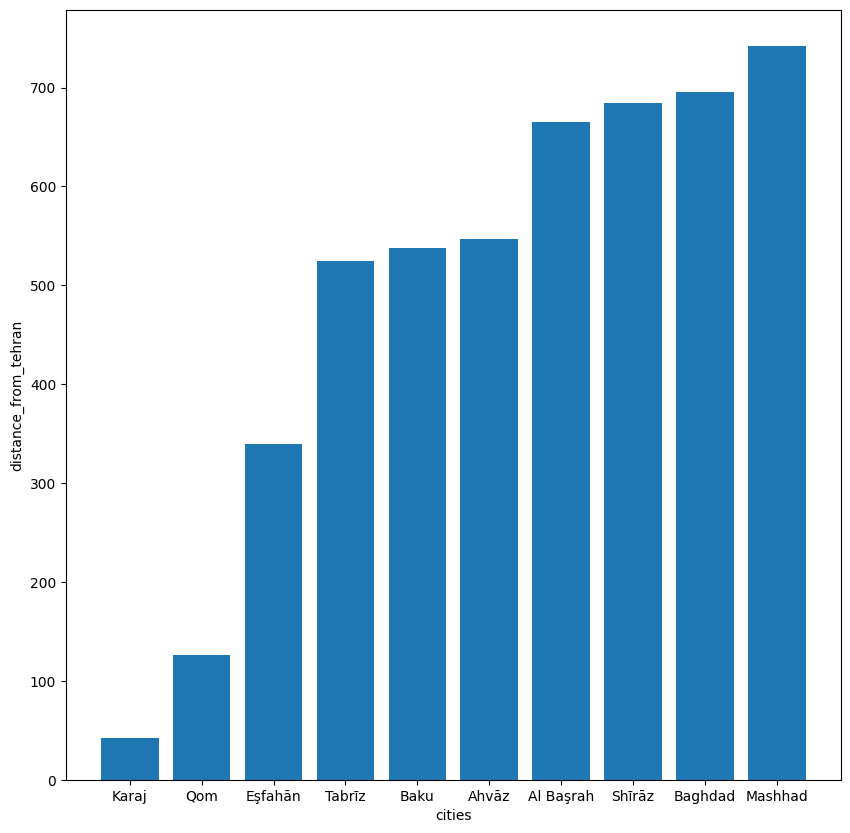

In [62]:
# 10 Nearest Cities to Tehran
import matplotlib.pyplot as plt

data_sorted = data_set.sort_values(by='dist_from_tehran',ascending= True).head(11)
data_10_city = data_sorted[data_sorted['city'] != 'Tehran']
plt.figure(figsize=(10, 10))
plt.bar(data_10_city['city'], data_10_city['dist_from_tehran'])
plt.xlabel('cities')
plt.ylabel('distance_from_tehran')
plt.savefig('plot_1.png' )
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعدی می‌خواهیم جمعیت 10 شهری که کمترین فاصله را با تهران دارند را رسم نمایید.
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_2.png </code>
</font>
</p>

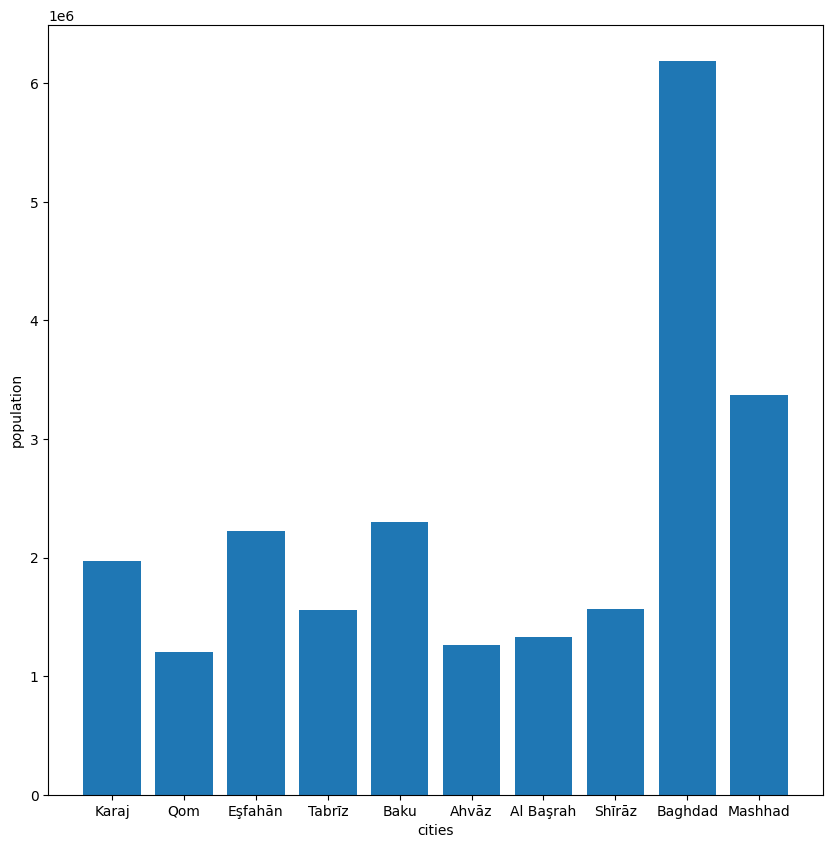

In [63]:
# Population of the 10 Nearest Cities to Tehran
plt.figure(figsize=(10, 10))
plt.bar(data_10_city['city'], data_10_city['population'])
plt.xlabel('cities')
plt.ylabel('population')
plt.savefig('plot_2.png')
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت آخر میخواهیم نمودار Scatter ای رسم کنید که محور افقی آن Longtitude و محور عمودی آن Latitude باشد. 
</font>
خروجی نهایی این نمودار با توجه به حجم بالای دیتاست بسیار جالب است.

<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_3.png </code>
</p>

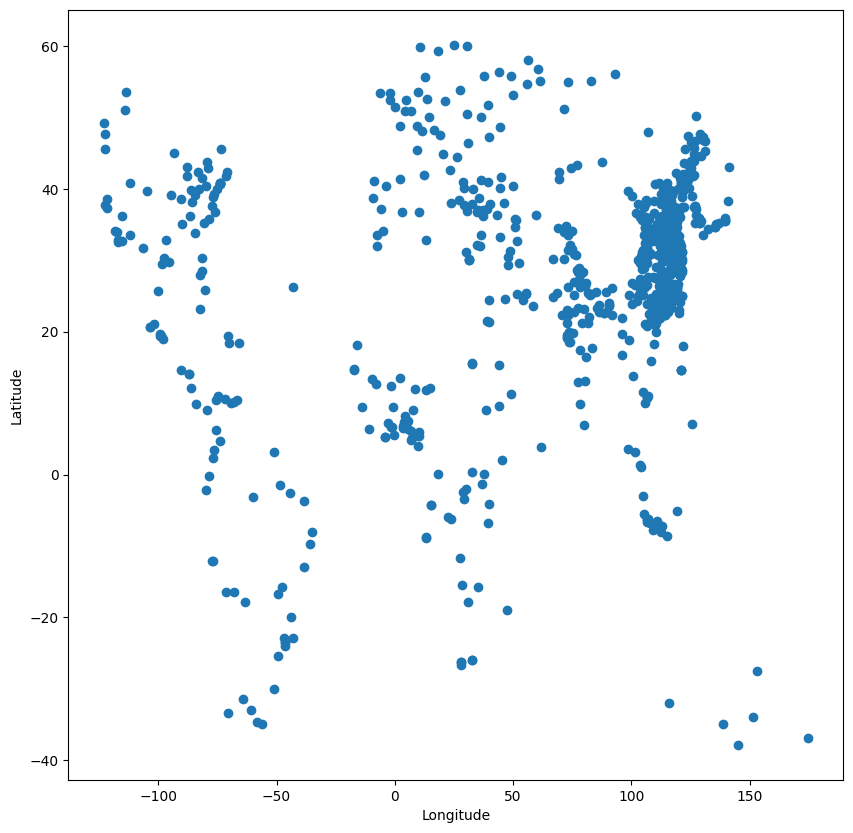

In [64]:
# City Latitudes and Longitudes
plt.figure(figsize=(10, 10))
plt.scatter(data_set['lng'], data_set['lat'], )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('plot_3.png')
plt.show()

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر نوع مصور سازی دیگر و یا تحلیل و کار با داده در صورتی که به فهم بهتر داده کمک کند نمره امتیازی خواهد داشت.
</p>

</div>

